class: edible=e, poisonous=p __<-- THIS IS OUR ULTIMATE GOAL: CLASSIFYING THE MUSHROOMS!!!!
cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s <br>
cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s<br>
cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
bruises: bruises=t,no=f<br>
odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s<br>
gill-attachment: attached=a,descending=d,free=f,notched=n<br>
gill-spacing: close=c,crowded=w,distant=d<br>
gill-size: broad=b,narrow=n<br>
gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y<br>
stalk-shape: enlarging=e,tapering=t<br>
stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?<br>
stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s<br>
stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s<br>
stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y<br>
stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
veil-type: partial=p,universal=u<br>
veil-color: brown=n,orange=o,white=w,yellow=y <br>
ring-number: none=n,one=o,two=t <br>
ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z <br>
spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y <br>
population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y <br>
habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d <br>

In [1]:
import datetime
from datetime import timedelta
from sklearn.model_selection import train_test_split

def timediff(s1,s2):
    datetimeFormat = '%H:%M:%S'
    diff = datetime.datetime.strptime(str(s2), datetimeFormat)\
        - datetime.datetime.strptime(str(s1), datetimeFormat)
    return diff

In [2]:
import pandas as pd
mushroom = pd.read_csv('mushrooms.csv')
mushroom.shape

(8124, 23)

In [3]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Selecting features


In [4]:
mushroom['odor'].value_counts()

n    3528
f    2160
y     576
s     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64

In [5]:
mushroom['cap-color'].value_counts()

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

In [6]:
#Stalk Color above ring - Silky (s) #1
pd.crosstab(mushroom['class'], mushroom['stalk-surface-above-ring'],margins=True)

stalk-surface-above-ring,f,k,s,y,All
class,,,,,
e,408,144,3640,16,4208
p,144,2228,1536,8,3916
All,552,2372,5176,24,8124


In [7]:
#Narrow Gills (b) #2
pd.crosstab(mushroom['class'], mushroom['gill-size'],margins=True)

gill-size,b,n,All
class,,,
e,3920,288,4208
p,1692,2224,3916
All,5612,2512,8124


In [8]:
#Habitat - Woods (d) #3
pd.crosstab(mushroom['class'], mushroom['habitat'],margins=True)

habitat,d,g,l,m,p,u,w,All
class,,,,,,,,
e,1880,1408,240,256,136,96,192,4208
p,1268,740,592,36,1008,272,0,3916
All,3148,2148,832,292,1144,368,192,8124


In [9]:
#Ring Type - evanescent (e) #4
pd.crosstab(mushroom['class'], mushroom['ring-type'],margins=True)

ring-type,e,f,l,n,p,All
class,,,,,,
e,1008,48,0,0,3152,4208
p,1768,0,1296,36,816,3916
All,2776,48,1296,36,3968,8124


In [10]:
#Population = Solitary (y) #5
pd.crosstab(mushroom['class'], mushroom['population'],margins=True)

population,a,c,n,s,v,y,All
class,,,,,,,
e,384,288,400,880,1192,1064,4208
p,0,52,0,368,2848,648,3916
All,384,340,400,1248,4040,1712,8124


In [11]:
#Stalk root - Bulbous (b) #6
pd.crosstab(mushroom['class'], mushroom['stalk-root'],margins=True)

stalk-root,?,b,c,e,r,All
class,,,,,,
e,720,1920,512,864,192,4208
p,1760,1856,44,256,0,3916
All,2480,3776,556,1120,192,8124


In [12]:
# Stalk shape = enlarging (e) # 7
pd.crosstab(mushroom['class'], mushroom['stalk-shape'],margins=True)

stalk-shape,e,t,All
class,,,
e,1616,2592,4208
p,1900,2016,3916
All,3516,4608,8124


# Creating binary variables 

In [13]:
y = mushroom.iloc[:,0] # create separate dataframe with only class
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [14]:
y = pd.get_dummies(y,drop_first=True)
y.head()
# compare the following output to the y.head() output to see which value gets the 1.

,p
0,1
1,0
2,0
3,1
4,0


In [15]:
#Enconding features
new_cols = ['stalk-surface-above-ring', 'gill-size', 'habitat', 'ring-type', 'population', 'stalk-root', 'stalk-shape'] # select the three features to encode
features = mushroom[new_cols].copy()
features.shape

(8124, 7)

In [16]:
X = pd.get_dummies(features,drop_first=False)
X.columns

Index(['stalk-surface-above-ring_f', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'gill-size_b', 'gill-size_n', 'habitat_d', 'habitat_g', 'habitat_l',
       'habitat_m', 'habitat_p', 'habitat_u', 'habitat_w', 'ring-type_e',
       'ring-type_f', 'ring-type_l', 'ring-type_n', 'ring-type_p',
       'population_a', 'population_c', 'population_n', 'population_s',
       'population_v', 'population_y', 'stalk-root_?', 'stalk-root_b',
       'stalk-root_c', 'stalk-root_e', 'stalk-root_r', 'stalk-shape_e',
       'stalk-shape_t'],
      dtype='object')

In [17]:
X = X[['stalk-surface-above-ring_s', 'gill-size_b', 'habitat_d',
        'ring-type_e', 
       'population_y', 'stalk-root_b', 'stalk-shape_e' ]]






In [18]:
y.head()

,p
0,1
1,0
2,0
3,1
4,0


In [19]:
X.head()

,stalk-surface-above-ring_s,gill-size_b,habitat_d,ring-type_e,population_y,stalk-root_b,stalk-shape_e
0,1,0,0,0,0,0,1
1,1,1,0,0,0,0,1
2,1,1,0,0,0,0,1
3,1,0,0,0,0,0,1
4,1,1,0,1,0,0,0


# Neural Network #1

In [20]:
#Train = 80%, Test = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, \
        random_state = 0)

In [21]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

# from keras.models import Sequential
# from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu')) # 8 node input layer AND 12 node hidden layer
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # output layer


W1213 18:11:29.727790 4417521088 deprecation.py:506] From /Users/KyleMontera/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'mse'])

W1213 18:11:29.878170 4417521088 deprecation.py:323] From /Users/KyleMontera/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [23]:
s1 = datetime.datetime.now().time().strftime('%H:%M:%S') # START

# The following line has been changed from previous version
# it now stores the history of the model's fit process in history
# and tracks how well it performs by comparing its fit level with the 
history = model.fit(X_train, y_train, epochs=70, validation_data=(X_test, y_test), \
                    batch_size=10, verbose=0) # I changed this line to store history
s2 = datetime.datetime.now().time().strftime('%H:%M:%S') # FINISH
time = timediff(s1,s2)

In [24]:
# evaluate the keras model
loss, accuracy, mse = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))
print('MSE: %.2f' % (mse*100))
print('Loss: %.2f' % (loss))
print('Time to run: ', time)

6499/6499 [==============================] - 0s 40us/sample - loss: 0.0325 - acc: 0.9895 - mean_squared_error: 0.0090
Accuracy: 98.95
MSE: 0.90
Loss: 0.03
Time to run:  0:01:26


# Overfit analysis


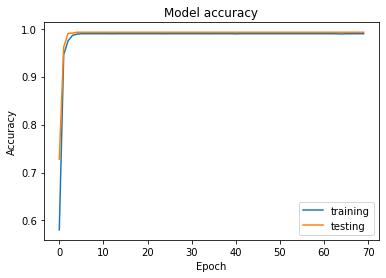

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['acc'], label='training')
plt.plot(history.history['val_acc'], label='testing')
plt.title('Model accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

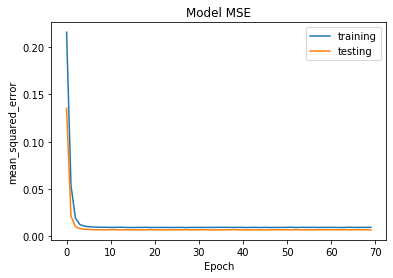

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['mean_squared_error'], label='training')
plt.plot(history.history['val_mean_squared_error'], label='testing')
plt.title('Model MSE')
plt.legend()
plt.ylabel('mean_squared_error')
plt.xlabel('Epoch')
plt.show()

# NN 1 Test set


In [27]:
s1 = datetime.datetime.now().time().strftime('%H:%M:%S') # START
history = model.fit(X_test, y_test, epochs=70, batch_size=10, verbose=0) # I changed this line to store history
s2 = datetime.datetime.now().time().strftime('%H:%M:%S') # FINISH
time = timediff(s1,s2)

In [28]:
# evaluate the keras model
loss, accuracy, mse = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))
print('MSE: %.2f' % (mse*100))
print('Loss: %.2f' % (loss))
print('Time to run: ', time)

1625/1625 [==============================] - 0s 42us/sample - loss: 0.0249 - acc: 0.9926 - mean_squared_error: 0.0065
Accuracy: 99.26
MSE: 0.65
Loss: 0.02
Time to run:  0:00:18


# Neural Network 2

In [29]:
# from keras.models import Sequential
# from keras.layers import Dense
model = Sequential()
model.add(Dense(8, input_dim=7, activation='relu')) # 8 node input layer AND 12 node hidden layer
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # output layer

In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'mse'])

In [31]:
s1 = datetime.datetime.now().time().strftime('%H:%M:%S') # START

# The following line has been changed from previous version
# it now stores the history of the model's fit process in history
# and tracks how well it performs by comparing its fit level with the 
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), \
                    batch_size=10, verbose=0) # I changed this line to store history
s2 = datetime.datetime.now().time().strftime('%H:%M:%S') # FINISH
time = timediff(s1,s2)

In [32]:
# evaluate the keras model
loss, accuracy, mse = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))
print('MSE: %.2f' % (mse*100))
print('Loss: %.2f' % (loss))
print('Time to run: ', time)

6499/6499 [==============================] - 0s 42us/sample - loss: 0.0341 - acc: 0.9895 - mean_squared_error: 0.0095
Accuracy: 98.95
MSE: 0.95
Loss: 0.03
Time to run:  0:01:09


# Overfit analysis

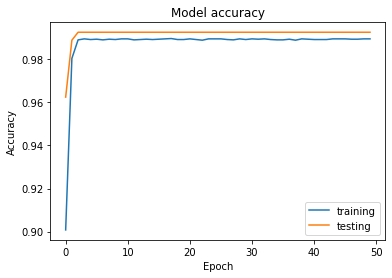

In [33]:
plt.plot(history.history['acc'], label='training')
plt.plot(history.history['val_acc'], label='testing')
plt.title('Model accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

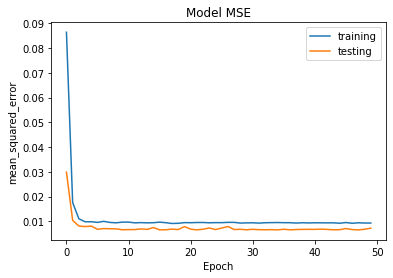

In [34]:
plt.plot(history.history['mean_squared_error'], label='training')
plt.plot(history.history['val_mean_squared_error'], label='testing')
plt.title('Model MSE')
plt.legend()
plt.ylabel('mean_squared_error')
plt.xlabel('Epoch')
plt.show()

# NN 2 Test Data

In [35]:
s1 = datetime.datetime.now().time().strftime('%H:%M:%S') # START
history = model.fit(X_test, y_test, epochs=50, batch_size=10, verbose=0) # I changed this line to store history
s2 = datetime.datetime.now().time().strftime('%H:%M:%S') # FINISH
time = timediff(s1,s2)

In [36]:
# evaluate the keras model
loss, accuracy, mse = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))
print('MSE: %.2f' % (mse*100))
print('Loss: %.2f' % (loss))
print('Time to run: ', time)

1625/1625 [==============================] - 0s 40us/sample - loss: 0.0265 - acc: 0.9926 - mean_squared_error: 0.0070
Accuracy: 99.26
MSE: 0.70
Loss: 0.03
Time to run:  0:00:14


# Neural Network 3 (Best)


In [37]:
model = Sequential()
model.add(Dense(6, input_dim=7, activation='relu')) 

model.add(Dense(1, activation='sigmoid')) # output layer

In [38]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'mse'])

In [39]:
s1 = datetime.datetime.now().time().strftime('%H:%M:%S') # START

# The following line has been changed from previous version
# it now stores the history of the model's fit process in history
# and tracks how well it performs by comparing its fit level with the 
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test), \
                    batch_size=10, verbose=0) # I changed this line to store history
s2 = datetime.datetime.now().time().strftime('%H:%M:%S') # FINISH
time = timediff(s1,s2)

In [40]:
# evaluate the keras model
loss, accuracy, mse = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))
print('MSE: %.2f' % (mse*100))
print('Loss: %.2f' % (loss))
print('Time to run: ', time)

6499/6499 [==============================] - 0s 41us/sample - loss: 0.0399 - acc: 0.9895 - mean_squared_error: 0.0099
Accuracy: 98.95
MSE: 0.99
Loss: 0.04
Time to run:  0:00:44


In [41]:
# make class predictions with the model
predictions = model.predict_classes(X_train) #  0 or 1
pred_probs = model.predict_proba(X_train) # probability of diabetes

In [42]:
pred_probs

array([[2.1675229e-04],
       [2.1675229e-04],
       [2.1675229e-04],
       ...,
       [2.0124316e-03],
       [7.0143637e-04],
       [1.7153931e-06]], dtype=float32)

In [43]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, predictions)

array([[3288,   68],
       [   0, 3143]])

# Overfit Analysis


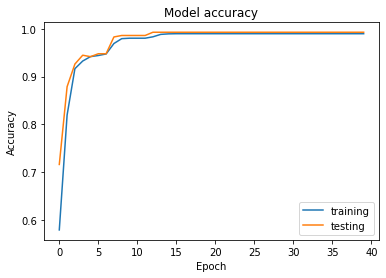

In [44]:
plt.plot(history.history['acc'], label='training')
plt.plot(history.history['val_acc'], label='testing')
plt.title('Model accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

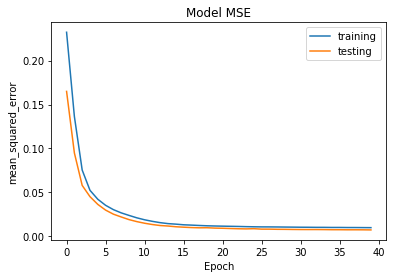

In [45]:
plt.plot(history.history['mean_squared_error'], label='training')
plt.plot(history.history['val_mean_squared_error'], label='testing')
plt.title('Model MSE')
plt.legend()
plt.ylabel('mean_squared_error')
plt.xlabel('Epoch')
plt.show()

# NN 3 Test Data

In [46]:
s1 = datetime.datetime.now().time().strftime('%H:%M:%S') # START
history = model.fit(X_test, y_test, epochs=40, batch_size=10, verbose=0) # I changed this line to store history
s2 = datetime.datetime.now().time().strftime('%H:%M:%S') # FINISH
time = timediff(s1,s2)

In [47]:
# evaluate the keras model
loss, accuracy, mse = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))
print('MSE: %.2f' % (mse*100))
print('Loss: %.2f' % (loss))
print('Time to run: ', time)

1625/1625 [==============================] - 0s 40us/sample - loss: 0.0299 - acc: 0.9926 - mean_squared_error: 0.0070
Accuracy: 99.26
MSE: 0.70
Loss: 0.03
Time to run:  0:00:10


In [48]:
# make class predictions with the model
predictions = model.predict_classes(X_test) #  0 or 1
pred_probs = model.predict_proba(X_test) # probability of Poison

In [49]:
predictions

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int32)

In [50]:
pred_probs

array([[8.9000672e-01],
       [1.3411045e-06],
       [1.1140108e-04],
       ...,
       [9.9812007e-01],
       [1.1140108e-04],
       [5.4693187e-04]], dtype=float32)

In [51]:
confusion_matrix(y_test, predictions)

array([[840,  12],
       [  0, 773]])

In [52]:
X_test

,stalk-surface-above-ring_s,gill-size_b,habitat_d,ring-type_e,population_y,stalk-root_b,stalk-shape_e
380,1,0,0,0,0,0,1
3641,1,1,1,0,1,1,0
273,1,1,0,0,0,0,1
1029,1,1,0,1,0,0,0
684,1,1,1,0,0,1,0
2899,1,1,1,0,0,1,0
1568,1,0,0,0,0,0,1
6126,1,0,0,1,0,0,0
2267,1,1,1,0,0,1,0
4030,0,1,1,0,1,1,1


# Predicting three mushrooms

In [53]:
import numpy as np

test = np.array([[0, 0, 1, 0, 0, 1 , 0 ]])
#Wooded area, bulbous stalk root shape

predictions = model.predict_classes(test) #  0 or 1
pred_probs = model.predict_proba(test) # probability of diabetes

In [54]:
predictions

array([[1]], dtype=int32)

In [55]:
pred_probs

array([[0.99998415]], dtype=float32)

In [104]:
test = np.array([[1, 0, 0, 0, 0 , 0 , 0 ]])
#Silky stalk surface above ring
predictions = model.predict_classes(test) #  0 or 1
pred_probs = model.predict_proba(test) # probability of diabetes

In [105]:
predictions

array([[0]], dtype=int32)

In [106]:
pred_probs

array([[0.12671205]], dtype=float32)

In [95]:
test = np.array([[0, 1, 0, 0, 1, 1 , 0 ]])
#Broad Gills, solitary, population, bulbous stalk root
predictions = model.predict_classes(test) #  0 or 1
pred_probs = model.predict_proba(test) # probability of diabetes

In [96]:
predictions

array([[1]], dtype=int32)

In [97]:
pred_probs

array([[0.98696893]], dtype=float32)

stalk-surface-above-ring_s <br>
gill-size_b <br>
habitat_d <br>
ring-type_e <br>
population_y <br>
stalk-root_b <br>
stalk-shape_e

